In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import and clean rpag data

rpag_data = pd.read_csv("rpag_data_2021.csv")

rpag_data.dropna(how="any", inplace=True)

jan_rpags = rpag_data[rpag_data["reg_group"].str.contains("JF|JI", regex=True)].reset_index()
sept_rpags = rpag_data[rpag_data["reg_group"].str.contains("SF|SI", regex=True)].reset_index()
mar_rpags = rpag_data[rpag_data["reg_group"].str.contains("MP")].reset_index()

jan_rpags.drop(np.where(jan_rpags["RPAG"] == "RPAG 1")[0], inplace=True, axis=0)
jan_rpags.reset_index(drop=True, inplace=True)
jan_rpags.drop(np.where(jan_rpags["RPAG"] == "RPAG 2")[0], inplace=True, axis=0)

jan_rpags["RPAG"] = jan_rpags["RPAG"].map({"RPAG 3": "RPAG 1", "RPAG 4": "RPAG 2", "RPAG 5": "RPAG 3", "RPAG 6": "RPAG 4"})

all_rpags = pd.concat([sept_rpags, jan_rpags, mar_rpags])

all_rpags.drop(columns="index", inplace=True)
all_rpags.drop(np.where(all_rpags["RPAG"] == "RPAG 6")[0], inplace=True, axis=0)



In [ ]:
#Get AES RPAGS
aes_rpags = all_rpags[all_rpags["SubjectName"] == "Academic English Skills"]

pivot = aes_rpags.pivot(index="name", columns=["RPAG"], values="PAG1")
pivot = pivot.apply(lambda x: x.map({"Green": 4.0, "Amber": 3.0, "Pink": 2.0, "Red": 1.0}))
pivot.drop(columns="RPAG 5", inplace=True)
pivot.dropna(how="all", inplace=True)
pivot.fillna(0)

for i in pivot.iterrows():
  palette = {}
  j = 1
  for x in i[1].values:
    if x == 4:
      palette.update({"RPAG {}".format(j): "#32cd32"})
    elif x == 3:
      palette.update({"RPAG {}".format(j): "#ffbf00"})
    elif x == 2:
      palette.update({"RPAG {}".format(j): "#ff69b4"})
    else:
      palette.update({"RPAG {}".format(j): "#e32636"})
    j+=1
  
  sns.barplot(x=i[1].index, y=i[1].values, palette=palette)
  plt.title("{}\n RPAG Information".format(i[0]))
  plt.yticks([1,2,3,4], labels=["Red", "Pink", "Amber", "Green"])
  plt.show()


fig, axs = plt.subplots(3,1, figsize=(10, 12))
palette = {"Green": "#32cd32", "Amber": "#ffbf00", "Pink": "#ff69b4", "Red": "#e32636"}
sns.countplot(x="reg_group", data=aes_rpags, hue="PAG1", palette=palette, dodge=True, hue_order=["Green", "Amber", "Pink", "Red"], ax=axs[0])
axs[0].set_xlabel("Pathway")
axs[0].set_xticklabels(labels=all_rpags["reg_group"].unique(), rotation=45, ha="right")
axs[0].set_title("AES RPAG ratings by cohort")

sns.countplot(x="RPAG", data=aes_rpags, hue="PAG1", palette=palette, hue_order=["Green", "Amber", "Pink", "Red"], ax=axs[1])
axs[1].set_title("AES RPAG ratings by reporting period")

plt.tight_layout()
plt.show()

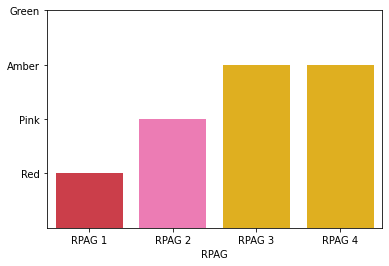

Index(['Abdulrahman Fawzi A ALSULAIMANI', 'Ada TORNOE',
       'Adam Progestian RAMADHAN', 'Ahmed Hamdan Saeed Hamad ALDEREI',
       'Ahmed Talal Faisal SHEIKH', 'Ahmet Ceylan', 'Albert KANOKOV',
       'Ali Ahmed Ali AL ARAIMI', 'Ali Khalid M H MOSTAFAWI', 'Alican DEMIR',
       ...
       'Yuwen WEI', 'ZHILIN ZHENG', 'Zain Mehboob ELAHI',
       'Zayed Khalifa Murad Abdulrahman ALBLOOSHI', 'Zehui WU',
       'Zhanna SHERIMOVA', 'Zhixuan HAO', 'Ziqi ZHANG', 'Zirui ZHANG',
       'Zu GONG'],
      dtype='object', name='name', length=184)


In [57]:
def get_rpag(student):
  data = pivot.loc[student]
  palette = {}
  j = 1
  for x in data.values:
    if x == 4:
      palette.update({"RPAG {}".format(j): "#32cd32"})
    elif x == 3:
      palette.update({"RPAG {}".format(j): "#ffbf00"})
    elif x == 2:
      palette.update({"RPAG {}".format(j): "#ff69b4"})
    else:
      palette.update({"RPAG {}".format(j): "#e32636"})
    j+=1
  
  sns.barplot(x=data.index, y=data.values, palette=palette)
  plt.yticks([1,2,3,4], labels=["Red", "Pink", "Amber", "Green"])
  plt.show()

get_rpag("Ziqi ZHANG")

print(pivot.index)
